In [2]:
import matplotlib.pyplot as plt
import numpy as np

from ema_workbench import ema_logging, load_results

ema_logging.log_to_stderr(level=ema_logging.INFO)

from ema_workbench.analysis.plotting import envelopes, lines
from ema_workbench.analysis.plotting_util import KDE

In [3]:
n = 10000
experiments, outcomes = load_results(r'../Data/{}_runs_cap_approach.tar.gz'.format(n))
results = load_results(r'../Data/{}_runs_cap_approach.tar.gz'.format(n))

print(experiments.shape) #500 scenarios
print(outcomes['level-of-achievability'].shape)

[MainProcess/INFO] results loaded succesfully from D:\Workspace\EMAworkbench\ema_workbench\examples\Data\10000_runs_cap_approach.tar.gz
[MainProcess/INFO] results loaded succesfully from D:\Workspace\EMAworkbench\ema_workbench\examples\Data\10000_runs_cap_approach.tar.gz


(10000L,)
(10000L, 2L, 101L)


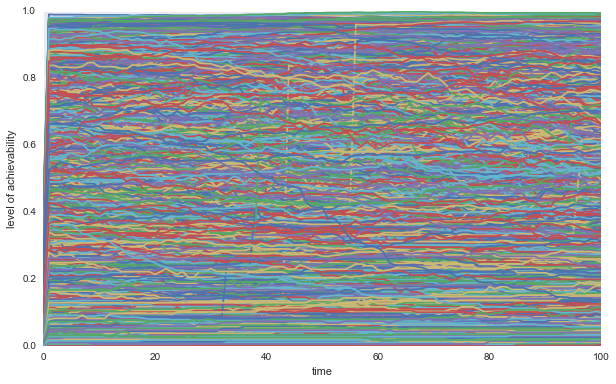

In [4]:
fig, ax = plt.subplots(1)


ax.plot(outcomes['level-of-achievability'][:,0,:].T)
ax.set_ylabel('level of achievability')
ax.set_xlabel('time')

fig.set_size_inches(10,6)
plt.show()

In [5]:
import ema_workbench.analysis.prim as prim

In [6]:
default_flow = 2.178849944502783e7
ooi_name = "level-of-achievability"
outcome = outcomes[ooi_name]
outcome = outcome/default_flow
#ooi = outcomes[ooi_name]
#ooi = np.reshape(ooi, (ooi.shape[0]*ooi.shape[1], ooi.shape[2]))
ooi = np.zeros(outcome.shape[0])
temp_outcomes = {ooi_name: ooi}
print ooi.shape

(10000L,)


In [7]:
import scipy as sp

In [147]:
data = np.mean(outcomes['level-of-achievability'][:,0,:],axis=1)

x = experiments
y = data < 0.2
prim_alg = prim.Prim(x, y, threshold=0.65)
box1 = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 3891 cases of interest
[MainProcess/INFO] mean: 0.65844402277, mass: 0.0527, coverage: 0.0891801593421, density: 0.65844402277 restricted_dimensions: 8.0


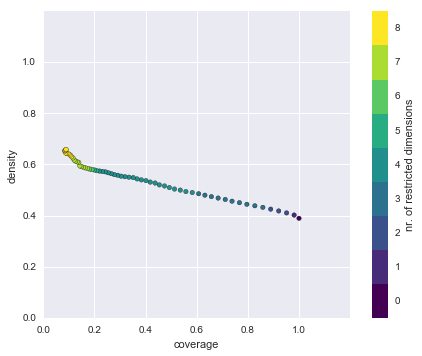

In [148]:
box1.show_tradeoff()

coverage    0.190439
density     0.579812
mass        0.127800
mean        0.579812
res dim     6.000000
Name: 40, dtype: float64

                                 box 40            \
                                    min       max   
social-network-size            2.000334  4.928491   
clustering-PCFs                0.000018  0.694186   
clustering-resources           0.048617  0.866998   
network-ratio                  0.081470  0.999955   
clustering-SCFs                0.054856  0.999924   
width-distributions-resources  0.027928  0.557157   

                                                                             
                                                                  qp values  
social-network-size                                [1.1972450774962101e-08]  
clustering-PCFs                                    [7.5466257900560851e-05]  
clustering-resources             [0.30589584265457359, 0.31064477152369652]  
network-ratio                                         

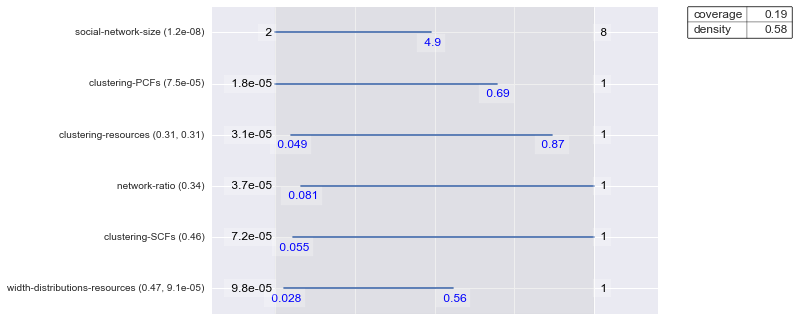

In [153]:
y = 40
box1.inspect(y)
box1.inspect(y, style='graph')
plt.show()

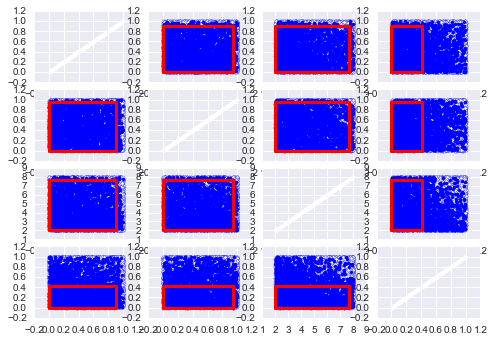

In [137]:
box1.select(21)
fig = box1.show_pairs_scatter()
plt.show()